In [2]:
# Deep Learning with Python, TensorFlow, and Keras tutorial https://www.youtube.com/watch?v=wQ8BIBpya2k&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN

In [3]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2676 - accuracy: 0.9210
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1078 - accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0745 - accuracy: 0.9770


In [4]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1003 - accuracy: 0.9670
0.10032251477241516 0.9670000076293945


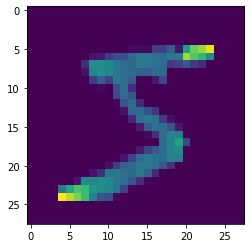

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()
print(x_train[0])

In [6]:
model.save('num_reader.model')

INFO:tensorflow:Assets written to: num_reader.model\assets


In [7]:
new_model = tf.keras.models.load_model('num_reader.model')

In [8]:
predictions = new_model.predict([x_test])
print(predictions)

313/313 [==============================] - 1s 2ms/step
[[8.1037266e-09 7.6055947e-08 3.5099713e-06 ... 9.9961239e-01
  1.4727584e-09 6.4466178e-07]
 [1.9433866e-08 5.9697276e-04 9.9897987e-01 ... 2.3743262e-07
  1.0341220e-06 3.9684472e-13]
 [2.1283623e-07 9.9969161e-01 2.4659798e-06 ... 7.9233396e-05
  1.1292771e-04 2.8547927e-06]
 ...
 [3.7807972e-08 5.8430892e-06 3.8353878e-08 ... 5.1456394e-05
  3.0998456e-06 3.0191281e-04]
 [3.2815274e-06 1.8509563e-05 2.0603488e-07 ... 4.7710137e-07
  3.8486681e-04 2.9159770e-08]
 [1.1319027e-05 1.1963292e-07 1.6241444e-07 ... 1.6279239e-10
  1.0158237e-07 9.1365049e-09]]


In [9]:
import numpy as np

print(np.argmax(predictions[1])) # The prediction for what the image is in the 0th position is given below

2


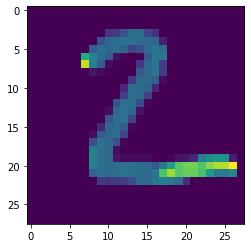

In [10]:
plt.imshow(x_test[1])
plt.show()